In [1]:
from qiskit import *

In [2]:
circuit = QuantumCircuit(3,3)

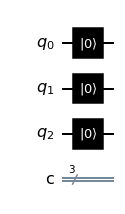

In [3]:
circuit = QuantumCircuit(3,3)
circuit.reset([0,1,2])
%matplotlib inline
circuit.draw(output='mpl')

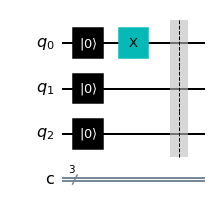

In [4]:
circuit.x([0])
circuit.barrier()
circuit.draw(output='mpl')

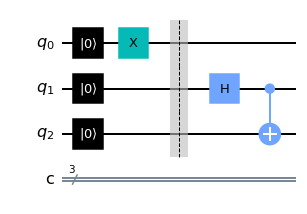

In [5]:
circuit.h([1])
circuit.cx([1],[2])
circuit.draw(output='mpl')

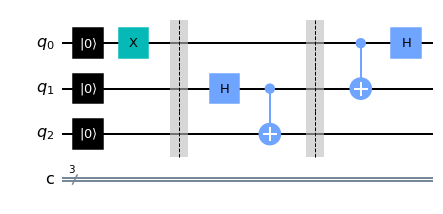

In [6]:
circuit.barrier()
circuit.cx([0],[1])
circuit.h([0])
circuit.draw(output='mpl')

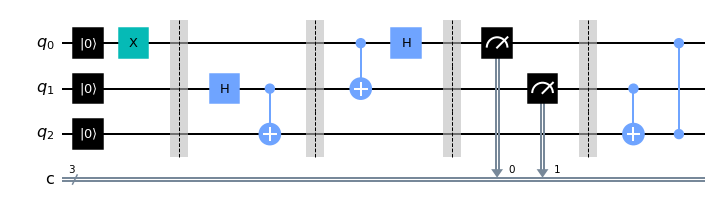

In [7]:
circuit.barrier()
circuit.measure([0,1], [0,1])
circuit.barrier()
circuit.cx([1],[2])
circuit.cz([0],[2])
circuit.draw(output='mpl')

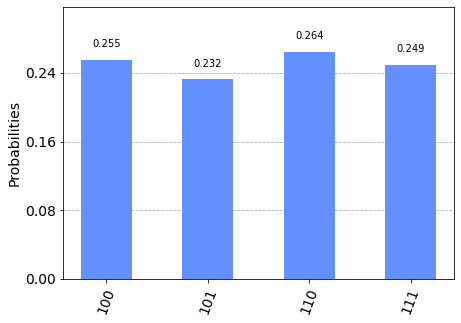

In [8]:
# claim (the state 1 in q0 has been teleported to q2)
# we can check it out by simulating the circuit

circuit.measure([2],[2])

simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend=simulator, shots=1024).result()
counts = result.get_counts()

from qiskit.tools.visualization import plot_histogram
plot_histogram(counts)

In [9]:
# these numbers are read as C2, C1, C0
# as we can see, we only get results where C2==|1>
print(counts)

{'111': 255, '110': 270, '100': 261, '101': 238}


ibmqfactory.load_account:WARNING:2021-08-22 14:13:35,433: Credentials are already in use. The existing account in the session will be replaced.


Job Status: job has successfully run


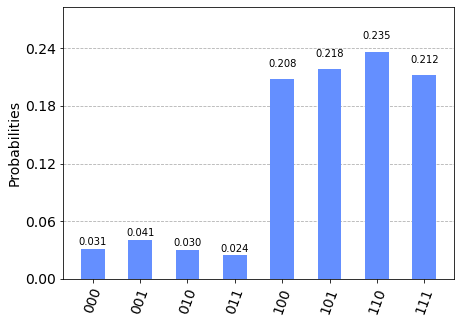

In [11]:
# now running it on remote quantum computer

IBMQ.load_account()
provider = IBMQ.get_provider('ibm-q')
qcomp = provider.get_backend('ibmq_manila')
job = execute(circuit, backend=qcomp, shots=1024)

from qiskit.tools.monitor import job_monitor
job_monitor(job)

result = job.result()
plot_histogram(result.get_counts())

In [12]:
print(result.get_counts())

{'000': 32, '001': 42, '010': 31, '011': 25, '100': 213, '101': 223, '110': 241, '111': 217}
